<a href="https://colab.research.google.com/github/sivarohith99/SivaRohith_INFO5731_Fall2024/blob/main/Jampana_SivaRohith_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

def analyze_data_science_abstracts(file_path='cleaned_data_science_abstracts.csv'):
    """Analyze data science abstracts for n-grams and phrases."""
    # Read and clean data
    df = pd.read_csv(file_path)
    print(f"Original dataset shape: {df.shape}")

    # Clean the DataFrame
    df = df.replace('nan', np.nan)
    df = df.dropna(subset=['Cleaned_Abstract'])
    df = df[df['Cleaned_Abstract'].str.strip() != '']
    print(f"Cleaned dataset shape: {df.shape}")

    # Get clean texts
    texts = df['Cleaned_Abstract'].tolist()

    # 1. Trigram Analysis
    def get_trigrams(text):
        words = text.split()
        return [' '.join(words[i:i+3]) for i in range(len(words) - 2)]

    trigram_counts = Counter()
    for text in texts:
        trigrams = get_trigrams(text)
        trigram_counts.update(trigrams)

    print("\nTop 20 Trigrams and their frequencies:")
    sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)
    for trigram, count in sorted_trigrams[:20]:
        print(f"{trigram}: {count}")

    # 2. Bigram Probability Analysis
    def get_bigrams(text):
        words = text.split()
        return [' '.join(words[i:i+2]) for i in range(len(words) - 1)]

    # Count words and bigrams
    word_counts = Counter()
    bigram_counts = Counter()

    for text in texts:
        words = text.split()
        word_counts.update(words)
        bigrams = get_bigrams(text)
        bigram_counts.update(bigrams)

    # Calculate conditional probabilities P(w2|w1)
    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram.split()
        bigram_probs[bigram] = count / word_counts[w1]

    print("\nTop 20 Bigram conditional probabilities:")
    sorted_bigrams = sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)
    for bigram, prob in sorted_bigrams[:20]:
        w1, w2 = bigram.split()
        print(f"P({w2}|{w1}) = {prob:.3f}")

    # 3. Noun Phrase Analysis
    # Common data science noun phrases based on the abstracts
    data_science_patterns = [
        'data scienc', 'artifici intellig', 'machin learn',
        'natur languag', 'deep learn', 'neural network',
        'big data', 'code gener', 'data analyt',
        'statist analysi', 'data process', 'data mine',
        'comput scienc', 'program languag', 'data clean',
        'data visual', 'predict model', 'metavers'
    ]

    # Calculate noun phrase frequencies for each text
    np_matrix = []
    for text in texts:
        np_freqs = {}
        for pattern in data_science_patterns:
            count = text.count(pattern)
            np_freqs[pattern] = count
        np_matrix.append(np_freqs)

    # Find maximum frequencies for normalization
    max_freqs = {}
    for pattern in data_science_patterns:
        max_freqs[pattern] = max(doc[pattern] for doc in np_matrix)

    # Calculate relative probabilities
    np_probs = []
    for doc_freqs in np_matrix:
        rel_probs = {}
        for pattern in data_science_patterns:
            max_freq = max_freqs[pattern]
            if max_freq > 0:
                rel_probs[pattern] = doc_freqs[pattern] / max_freq
            else:
                rel_probs[pattern] = 0
        np_probs.append(rel_probs)

    # Create DataFrame with relative probabilities
    np_df = pd.DataFrame(np_probs)
    np_df.index = [f'Text_{i+1}' for i in range(len(np_probs))]

    print("\nNoun Phrase Analysis:")
    print(f"Number of texts analyzed: {len(texts)}")
    print(f"Number of noun phrases analyzed: {len(data_science_patterns)}")
    print("\nSample of noun phrase relative probabilities (first 5 texts):")
    print(np_df.head())

    # Return all results
    results = {
        'trigram_frequencies': dict(trigram_counts),
        'bigram_probabilities': bigram_probs,
        'noun_phrase_probabilities': np_df
    }

    return results

# Run the analysis
if __name__ == "__main__":
    results = analyze_data_science_abstracts()



Original dataset shape: (1000, 3)
Cleaned dataset shape: (772, 3)

Top 20 Trigrams and their frequencies:
data scienc project: 26
citizen scienc project: 23
social scienc research: 21
field data scienc: 20
data scienc educ: 20
data data scienc: 16
practic data scienc: 15
big data scienc: 15
chapter summari chapter: 15
summari chapter problem: 15
use data scienc: 14
machin learn data: 14
big data analyt: 14
data scienc method: 14
larg data set: 14
natur languag process: 13
data scienc team: 13
data scienc data: 13
big data data: 13
data scienc machin: 12

Top 20 Bigram conditional probabilities:
P(univers|cambridg) = 1.000
P(task|languagerel) = 1.000
P(cost|outweigh) = 1.000
P(finetun|scratch) = 1.000
P(solut|codexpredict) = 1.000
P(metric|multicriteria) = 1.000
P(constraint|surfaceform) = 1.000
P(memor|defend) = 1.000
P(current|pretrain) = 1.000
P(achiev|codex) = 1.000
P(room|ampl) = 1.000
P(featur|httpscacmacmorg) = 1.000
P(blogcacm|blogger) = 1.000
P(commun|blogcacm) = 1.000
P(twitte

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import math
import re

class TFIDFRanker:
    def __init__(self):
        self.documents = []
        self.vocab = set()
        self.doc_freqs = defaultdict(int)  # Document frequency for each term
        self.term_weights = None  # TF-IDF matrix
        self.vocab_index = {}  # Mapping of terms to matrix indices

    def preprocess_text(self, text):
        """Preprocess text by splitting into terms."""
        # Split text into terms
        terms = text.lower().split()
        return terms

    def fit(self, documents):
        """Build TF-IDF matrix from documents."""
        self.documents = documents

        # Build vocabulary and document frequencies
        print("Building vocabulary...")
        for doc in self.documents:
            terms = set(self.preprocess_text(doc))  # Unique terms in document
            self.vocab.update(terms)
            # Update document frequencies
            for term in terms:
                self.doc_freqs[term] += 1

        # Create vocabulary index mapping
        self.vocab_index = {term: idx for idx, term in enumerate(sorted(self.vocab))}

        # Initialize TF-IDF matrix
        num_docs = len(self.documents)
        vocab_size = len(self.vocab)
        self.term_weights = np.zeros((num_docs, vocab_size))

        print(f"Computing TF-IDF matrix for {num_docs} documents and {vocab_size} terms...")

        # Calculate TF-IDF weights
        for doc_idx, doc in enumerate(self.documents):
            # Calculate term frequencies for document
            term_freqs = Counter(self.preprocess_text(doc))

            # Calculate weights for each term in document
            for term, freq in term_freqs.items():
                if term in self.vocab_index:
                    term_idx = self.vocab_index[term]

                    # Calculate TF (normalized by document length)
                    tf = freq / len(self.preprocess_text(doc))

                    # Calculate IDF
                    idf = math.log(num_docs / (self.doc_freqs[term] + 1))

                    # Store TF-IDF weight
                    self.term_weights[doc_idx, term_idx] = tf * idf

        print("TF-IDF matrix built successfully!")

    def get_query_vector(self, query):
        """Convert query to TF-IDF vector."""
        query_vector = np.zeros(len(self.vocab))
        query_terms = Counter(self.preprocess_text(query))

        # Calculate query weights
        for term, freq in query_terms.items():
            if term in self.vocab_index:
                term_idx = self.vocab_index[term]

                # Calculate TF for query term
                tf = freq / len(self.preprocess_text(query))

                # Use same IDF as document terms
                idf = math.log(len(self.documents) / (self.doc_freqs[term] + 1))

                query_vector[term_idx] = tf * idf

        return query_vector

    def cosine_similarity(self, vec1, vec2):
        """Calculate cosine similarity between two vectors."""
        dot_product = np.dot(vec1, vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)

        if norm1 == 0 or norm2 == 0:
            return 0

        return dot_product / (norm1 * norm2)

    def rank_documents(self, query):
        """Rank documents by similarity to query."""
        # Get query vector
        query_vector = self.get_query_vector(query)

        # Calculate similarities
        similarities = []
        for doc_idx, doc_vector in enumerate(self.term_weights):
            sim = self.cosine_similarity(query_vector, doc_vector)
            similarities.append((doc_idx, sim))

        # Sort by similarity score
        ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
        return ranked_docs

# Function to load and analyze documents
def analyze_documents(file_path, query):
    """Load documents and perform TF-IDF analysis."""
    # Load data
    print("Loading documents...")
    df = pd.read_csv(file_path)
    df = df.dropna(subset=['Cleaned_Abstract'])
    documents = df['Cleaned_Abstract'].tolist()

    # Create and fit TF-IDF ranker
    ranker = TFIDFRanker()
    ranker.fit(documents)

    # Rank documents for query
    print(f"\nRanking documents for query: '{query}'")
    ranked_docs = ranker.rank_documents(query)

    # Print top results
    print("\nTop 5 most relevant documents:")
    for i, (doc_idx, similarity) in enumerate(ranked_docs[:5], 1):
        # Get original title if available
        title = df.iloc[doc_idx]['Title'] if 'Title' in df.columns else f"Document {doc_idx + 1}"
        print(f"\n{i}. {title}")
        print(f"Similarity Score: {similarity:.4f}")
        print("Abstract excerpt:", documents[doc_idx][:200], "...")

    return ranker, ranked_docs

# Example usage
if __name__ == "__main__":
    # Example query related to data science
    query = "machine learning and artificial intelligence applications in data science"

    # Analyze documents
    ranker, rankings = analyze_documents('cleaned_data_science_abstracts.csv', query)

    # Additional analysis if needed
    print(f"\nVocabulary size: {len(ranker.vocab)}")
    print(f"Number of documents: {len(ranker.documents)}")

    # Print some term weights
    print("\nSample TF-IDF weights for first document:")
    sample_terms = list(ranker.vocab)[:5]
    for term in sample_terms:
        term_idx = ranker.vocab_index[term]
        weight = ranker.term_weights[0, term_idx]
        print(f"{term}: {weight:.4f}")






Loading documents...
Building vocabulary...
Computing TF-IDF matrix for 772 documents and 7623 terms...
TF-IDF matrix built successfully!

Ranking documents for query: 'machine learning and artificial intelligence applications in data science'

Top 5 most relevant documents:

1. The data revolution : big data, open data, data infrastructures & their consequences
Similarity Score: 0.0372
Abstract excerpt: chapter conceptualis data data kind data data inform knowledg wisdom frame data think critic databas data infrastructur data assemblag data revolut chapter small data data infrastructur data broker da ...

2. Data Science
Similarity Score: 0.0303
Abstract excerpt: st centuri usher age big data data economi data dna carri import knowledg insight potenti becom intrins constitu databas organ appropri understand data dna organ reli new field data scienc keyston ana ...

3. Critique and Contribute: A Practice-Based Framework for Improving Critical Data Studies and Data Science
Similarity Sc

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Number of documents processed: 772
Sample of first document words: ['cambridg', 'univers', 'press', 'let', 'u', 'summar', 'find', 'random', 'project', 'set']
Model training completed successfully
Vocabulary size: 3927


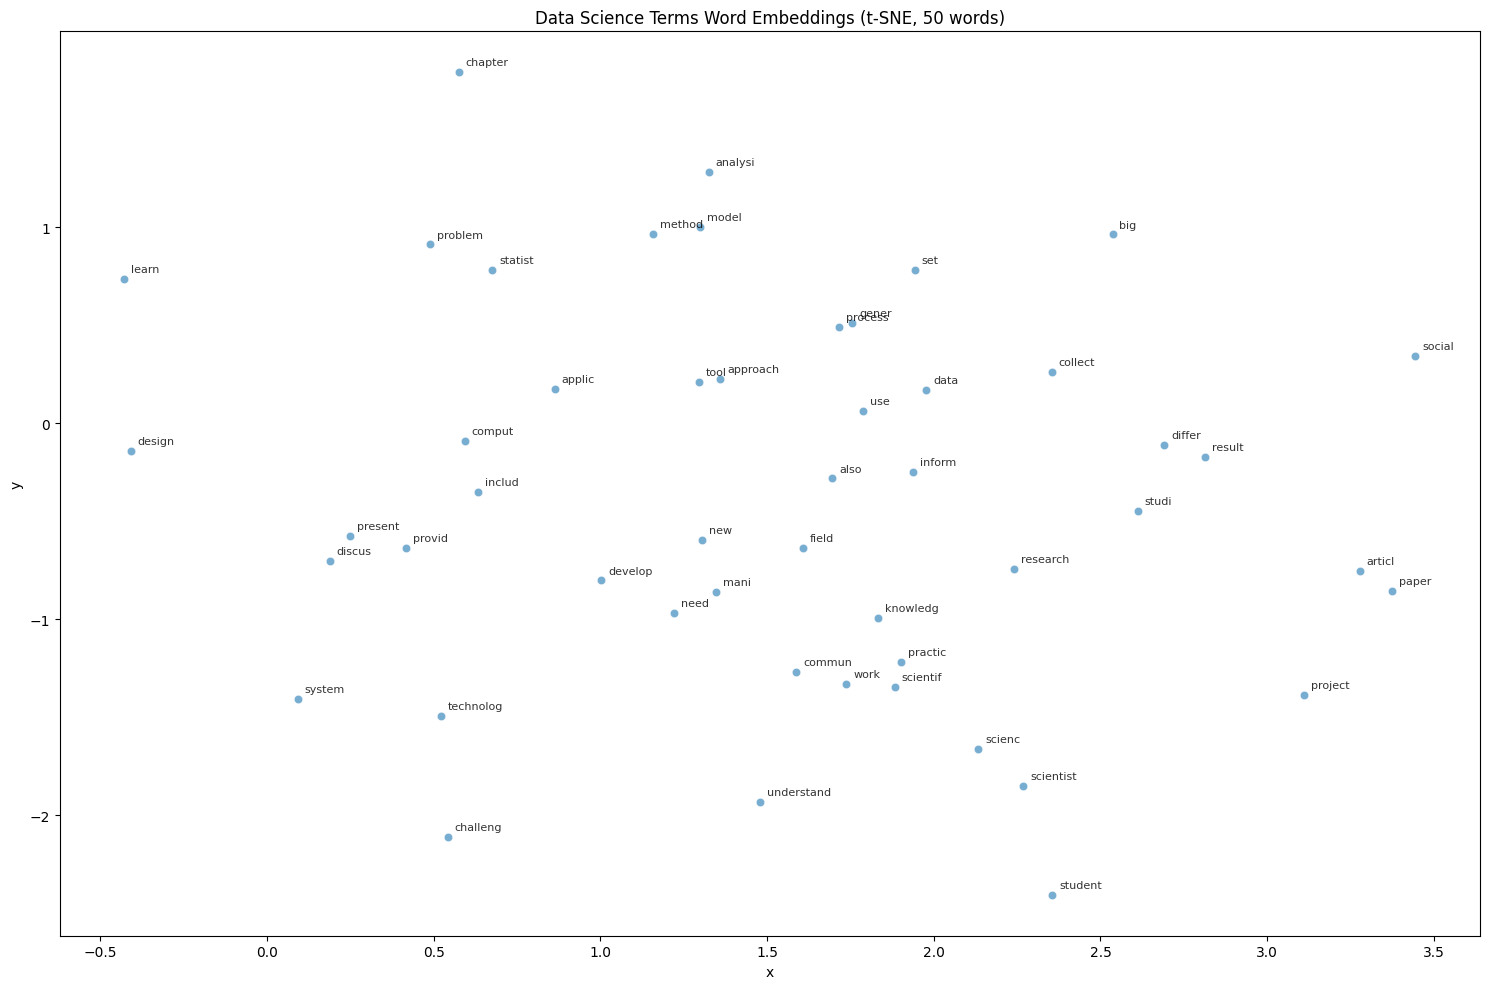


Words most similar to 'data':
plural: 0.6330
largevolum: 0.6177
common: 0.6126
popular: 0.5878
analyz: 0.5866

Words most similar to 'scienc':
medium: 0.6544
informat: 0.6107
scientist: 0.5968
justic: 0.5937
promin: 0.5769

Words most similar to 'learn':
learningml: 0.8452
vector: 0.7362
think: 0.6437
desktop: 0.6303
familiar: 0.6296

Words most similar to 'model':
lr: 0.7747
linear: 0.7641
multilevel: 0.7574
regress: 0.7551
gnn: 0.7513

Words most similar to 'ai':
artifici: 0.9474
intellig: 0.9350
metavers: 0.9241
iot: 0.8988
securityblockchain: 0.8871
Model saved successfully


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_process_data(texts):
    """Convert text data into list of word lists for Word2Vec"""
    processed_texts = [str(text).split() for text in texts if pd.notna(text)]
    return [text for text in processed_texts if text]

def train_word2vec_model(sentences, vector_size=300, window=5, min_count=2):
    """Train Word2Vec model with specified parameters"""
    model = Word2Vec(vector_size=vector_size,
                    window=window,
                    min_count=min_count,
                    workers=4)

    model.build_vocab(sentences)
    model.train(sentences, total_examples=model.corpus_count, epochs=30)

    return model

def visualize_embeddings(model, num_words=50):
    """Create t-SNE visualization of word embeddings"""
    # Get vocabulary words
    vocab = list(model.wv.key_to_index.keys())

    # Adjust num_words if vocabulary is smaller
    num_words = min(len(vocab), num_words)

    # Ensure we have enough words for visualization
    if num_words < 5:
        print("Not enough words in vocabulary for meaningful visualization")
        return

    common_words = vocab[:num_words]
    word_vectors = np.array([model.wv[word] for word in common_words])

    # Adjust perplexity based on number of words
    perplexity = min(30, num_words - 1)

    # Perform t-SNE with adjusted parameters
    tsne = TSNE(n_components=2,
                perplexity=perplexity,
                learning_rate='auto',
                init='pca',
                random_state=42)

    try:
        embeddings_2d = tsne.fit_transform(word_vectors)

        # Create visualization
        plt.figure(figsize=(15, 10))

        # Create DataFrame for plotting
        df = pd.DataFrame({
            'x': embeddings_2d[:, 0],
            'y': embeddings_2d[:, 1],
            'word': common_words
        })

        # Plot points
        sns.scatterplot(data=df, x='x', y='y', alpha=0.6)

        # Add labels with adjusted font size
        for idx, row in df.iterrows():
            plt.annotate(row['word'],
                        (row['x'], row['y']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8,
                        alpha=0.8)

        plt.title(f'Data Science Terms Word Embeddings (t-SNE, {num_words} words)')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during visualization: {str(e)}")

def analyze_word_relationships(model, words_to_analyze):
    """Analyze relationships between words in the model"""
    for word in words_to_analyze:
        try:
            similar_words = model.wv.most_similar(word, topn=5)
            print(f"\nWords most similar to '{word}':")
            for w, score in similar_words:
                print(f"{w}: {score:.4f}")
        except KeyError:
            print(f"'{word}' not in vocabulary")

def main():
    # Load your actual abstracts here
    abstracts = [
        "chatgpt convers ai interfac util natur languag process machin learn algorithm take world storm buzzword across mani sector today given like impact model data scienc perspect articl seek provid overview potenti opportun challeng associ use chatgpt data scienc provid reader snapshot advantag stimul interest use data scienc project",
        "introduc d code gener benchmark thousand data scienc problem span seven python librari numpi panda compar prior work d incorpor three core featur first problem reflect diver realist practic use case sinc collect stackoverflow second automat evalu highli specif reliabl"
    ]

    # Add all your abstracts from the CSV file here
    df = pd.read_csv('cleaned_data_science_abstracts.csv')
    abstracts = df['Cleaned_Abstract'].tolist()

    processed_texts = load_and_process_data(abstracts)

    if not processed_texts:
        raise ValueError("No valid texts found after processing")

    print(f"Number of documents processed: {len(processed_texts)}")
    print(f"Sample of first document words: {processed_texts[0][:10]}")

    try:
        # Train model
        model = train_word2vec_model(processed_texts)
        print("Model training completed successfully")
        print(f"Vocabulary size: {len(model.wv.key_to_index)}")

        # Visualize embeddings
        visualize_embeddings(model)

        # Analyze specific data science related terms
        words_to_analyze = ['data', 'scienc', 'learn', 'model', 'ai']
        analyze_word_relationships(model, words_to_analyze)

        # Save model
        model.save("data_science_word2vec.model")
        print("Model saved successfully")

        return model

    except Exception as e:
        print(f"Error during model training: {str(e)}")
        raise

if __name__ == "__main__":
    model = main()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/sivarohith99/SivaRohith_INFO5731_Fall2024/blob/b70f26353f1fb51f99d622ce202564f16b0830c2/oppenheimer.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
This NLP task was both rewarding and challenging. Implementing each stage from scratch, especially for techniques like word embeddings and N-gram analysis, was a major hurdle. Handling natural language data and visualizing word embeddings also posed difficulties. Despite these challenges, the practical experience and insights gained, especially from word embedding visualization, were invaluable. The allocated time was sufficient, but additional time could have allowed for more thorough testing. Overall, this task provided a valuable learning experience in NLP
'''

'\nThis NLP task was both rewarding and challenging. Implementing each stage from scratch, especially for techniques like word embeddings and N-gram analysis, was a major hurdle. Handling natural language data and visualizing word embeddings also posed difficulties. Despite these challenges, the practical experience and insights gained, especially from word embedding visualization, were invaluable. The allocated time was sufficient, but additional time could have allowed for more thorough testing. Overall, this task provided a valuable learning experience in NLP\n'